In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
#There are 10000 entries and 14 features in the dataset we're going to use
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#from this, we figure out that theres no missing values in this dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
#Theres no duplicated values in this
df.duplicated().sum()

0

In [7]:
#theres 7963 account holders and 2037 people who exited
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
#this bank operates in 3 regions with a majority of holders from France
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
#these features were irrelevant for our case so they were dropped
df.drop(['RowNumber' , 'CustomerId' , 'Surname'], axis = 1 , inplace = True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
#mapped all the features which were string to numerical values through the get_dummies command from Pandas
df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first = True , dtype = int)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
#split dataset into training and testing data
y = df['Exited']
X = df.drop('Exited' , axis = 1)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
X_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
#scaling the data before training
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [52]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
#intantiate neural network
model = Sequential()
#add 11 nodes to the first hidden layer with relu activation function
model.add(Dense(11,activation = 'relu' , input_dim = 11))
#Add 11 nodes to the second hidden layer with relu activation function
model.add(Dense(11,activation = 'relu'))
#make the output node with sigmoid activation function
model.add(Dense(1,activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
#theres 276 total weights and biases to this model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#we've chosen binary crossentropy as we are classifying into 0 or 1 .We are using accuracy as a metric and Adam optimizer
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [40]:
#Fit the training and scaled data to the neural network with 100 epochs or iterations and 20% validation split
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5968 - loss: 0.6580 - val_accuracy: 0.7975 - val_loss: 0.4955
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8018 - loss: 0.4791 - val_accuracy: 0.7981 - val_loss: 0.4601
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7965 - loss: 0.4577 - val_accuracy: 0.8019 - val_loss: 0.4459
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4473 - val_accuracy: 0.8075 - val_loss: 0.4364
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8094 - loss: 0.4300 - val_accuracy: 0.8075 - val_loss: 0.4264
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8051 - loss: 0.4307 - val_accuracy: 0.8125 - val_loss: 0.4126
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.4108 - val_accuracy: 0.8244 - val_loss: 0.3978
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8393 - loss: 0.3883 - val_accu

In [41]:
model.layers[0].get_weights()

[array([[ 5.06522655e-02,  7.38881230e-02,  2.15404317e-01,
          1.69452131e-01, -3.17226537e-02,  4.70568240e-01,
          3.00864995e-01,  1.12403501e-02, -2.70816743e-01,
         -2.59501249e-01, -3.80378403e-02],
        [-7.82154918e-01, -1.09679544e+00, -7.12945759e-01,
          1.74835816e-01, -4.44967121e-01,  2.82363482e-02,
          5.82090855e-01,  1.97271526e-01, -4.31537390e-01,
          4.95479703e-01,  1.60619766e-01],
        [-1.21263072e-01,  4.67145771e-01, -1.45373166e-01,
          2.89303809e-01, -2.48786956e-01,  7.17484474e-01,
         -2.43535787e-01, -2.90273149e-02,  2.14007497e-01,
          3.56964797e-01, -9.96799916e-02],
        [-1.33273453e-01,  1.10245861e-01, -1.31937429e-01,
         -1.66663051e-01,  6.71814680e-02,  1.61893532e-01,
         -2.99204171e-01,  3.62740695e-01, -2.76042428e-02,
          4.07885879e-01, -3.20777208e-01],
        [ 6.82031810e-02,  3.43591720e-01,  2.33233124e-01,
          5.71990252e-01,  2.89155662e-01,  

In [42]:
model.layers[1].get_weights()

[array([[-0.282165  ,  0.20993067, -0.5492704 ,  0.32745922, -0.8490203 ,
         -0.75811815, -0.72693765,  0.22845176,  0.08365723, -0.06868535,
          0.27785146],
        [ 0.14511253,  0.18850534, -0.45704713,  0.30264056,  0.34262043,
          0.14592594, -1.1306344 ,  0.3248456 , -1.0449644 ,  0.5208241 ,
         -0.05220136],
        [ 0.31742612, -0.30692908,  0.17971677,  0.12677217, -0.88804543,
          0.04275023,  0.18945037,  0.4641309 , -0.66103554,  0.38808337,
         -0.25548884],
        [ 0.05695197,  0.5045203 ,  0.70700127,  0.5024833 ,  0.00838674,
          0.35196477,  0.44785005,  0.13208078, -1.029436  , -0.17812636,
          0.4174014 ],
        [-0.04355044, -0.00597856,  0.7271094 ,  0.40350878, -0.48175204,
         -0.05515793, -0.58028114,  0.07951094,  0.1665954 , -0.19802688,
          0.0073782 ],
        [-0.18855731, -0.21877912,  0.1008433 ,  0.17584696,  0.68814325,
          0.12524061, -0.48582223,  0.06938293,  0.40684015, -0.2112784

In [43]:
model.layers[2].get_weights()

[array([[ 1.4370579 ],
        [-0.422877  ],
        [-1.2389202 ],
        [-0.80588585],
        [ 0.8261584 ],
        [ 0.87466276],
        [ 1.0219282 ],
        [-0.41875088],
        [ 1.1979952 ],
        [ 1.3363876 ],
        [ 0.9439497 ]], dtype=float32),
 array([-0.32873994], dtype=float32)]

In [44]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
#converting predictions to 0 or 1 by comparing them to 0.5
np.where(y_log>0.5,1,0)
pred_y = np.where(y_log>0.5,1,0)

In [46]:
#Ggot an accuracy of 86.35%
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred_y)

0.8605

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
#history.history

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: >

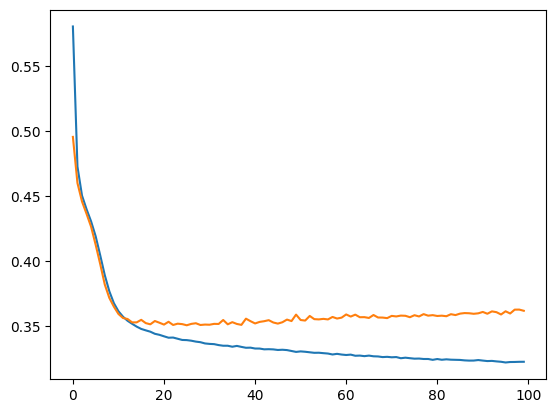

In [49]:
#Lineplot bw loss and validation loss
sns.lineplot(history.history['loss'])
sns.lineplot(history.history['val_loss'])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: >

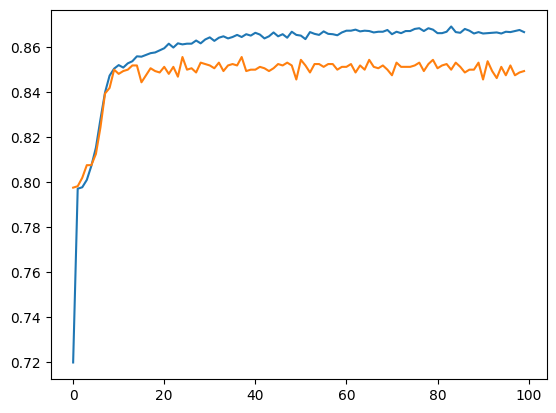

In [50]:
#plot between accuracy and validation accuracy
sns.lineplot(history.history['accuracy'])
sns.lineplot(history.history['val_accuracy'])